# Practical 3
Comparing analytic and FD solution for toy thickness equation

## Analytical Solution

Eqn is $\frac{dH}{dt} = \frac{(H_f - H)}{B}$. Solved by $H(t) = H_f (1-exp(-t/B))$

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
t = np.arange(0,1000)
H_f = 1000
B = 150

H = H_f*(1- np.exp(-t/B))

Text(0, 0.5, 'thickness [m]')

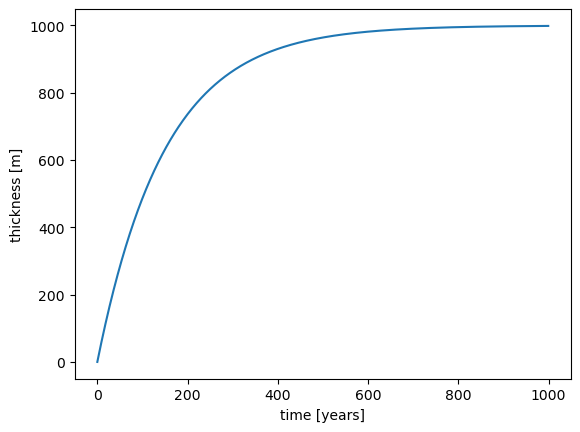

In [19]:
plt.plot(t,H)
plt.xlabel('time [years]')
plt.ylabel('thickness [m]')

## FD Approximation

In [28]:
H_fd = np.zeros(t.shape)
H_init = 0
dt = np.mean(np.diff(t,1))
H_fd[0] = H_init
for i in range(1,len(t)):
    H_fd[i] = H_fd[i-1] + dt*(H_f-H_fd[i-1])/B
    


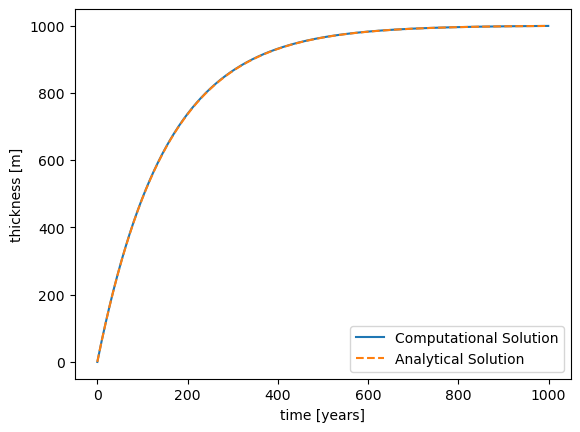

In [34]:
plt.plot(t,H_fd,label='Computational Solution')
plt.plot(t,H,'--',label='Analytical Solution')

plt.xlabel('time [years]')
plt.ylabel('thickness [m]')
plt.legend()


## Residuals

Text(0, 0.5, 'thickness difference [m]')

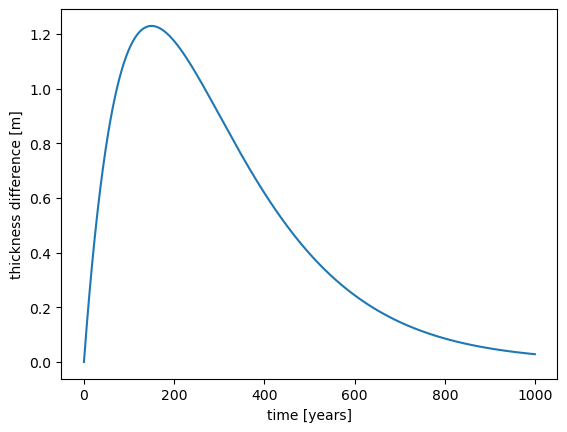

In [36]:
plt.plot(t,H_fd-H)
plt.xlabel('time [years]')
plt.ylabel('thickness difference [m]')


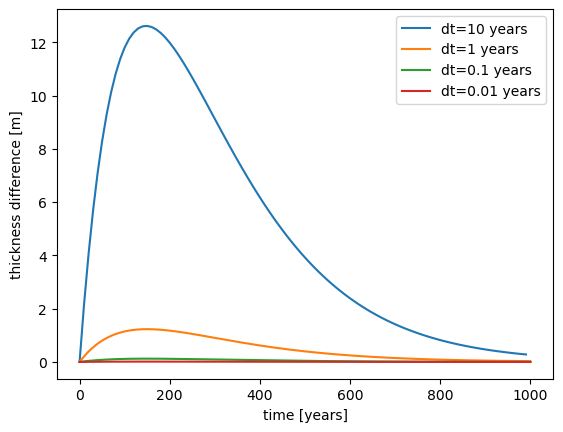

In [43]:
rmse = []
for dt in [10,1,0.1,0.01]:
    t = np.arange(0,1000,dt)
    H = H_f*(1- np.exp(-t/B))
    H_fd = np.zeros(t.shape)
    H_init = 0
    H_fd[0] = H_init
    for i in range(1,len(t)):
        H_fd[i] = H_fd[i-1] + dt*(H_f-H_fd[i-1])/B
    rmse.append(np.sqrt(np.mean((H_fd-H)**2)))
    plt.plot(t,H_fd-H,label=f'dt={dt} years')
    plt.xlabel('time [years]')
    plt.ylabel('thickness difference [m]')
    plt.legend()


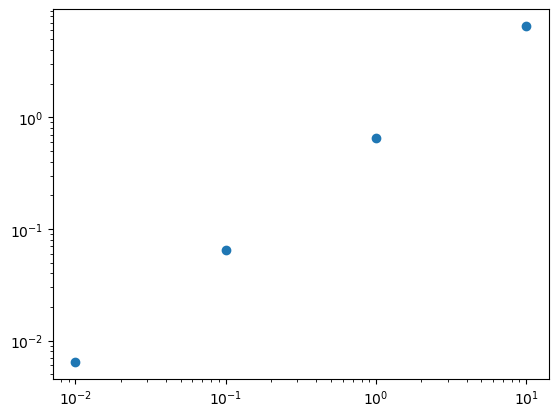

In [46]:
plt.loglog([10,1,0.1,0.01],rmse,'o')